In [2]:
#Redundant Question Dection -> Project by Shubham Pawar and Vishal Kamble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Documents/dataset/questions.csv")

In [4]:
df.shape

(404351, 6)

In [5]:
#duplicate and non duplicate questions in dataset
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

0    255045
1    149306
Name: is_duplicate, dtype: int64
0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<AxesSubplot:ylabel='is_duplicate'>

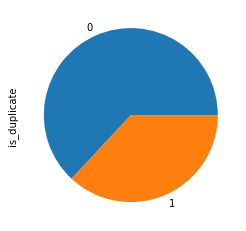

In [6]:
df['is_duplicate'].value_counts().plot(kind='pie')

In [7]:
new_df=df.sample(35000,random_state=2)

In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [9]:
#new sample data frame
new_df.shape

(35000, 6)

In [10]:
#Findning number of duplicate and non duplicate questions in sample data 
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)

0    22059
1    12941
Name: is_duplicate, dtype: int64
0    63.025714
1    36.974286
Name: is_duplicate, dtype: float64


<AxesSubplot:ylabel='is_duplicate'>

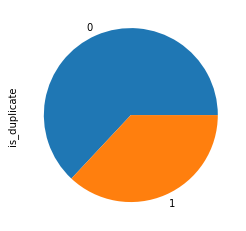

In [11]:
new_df['is_duplicate'].value_counts().plot(kind='pie')

In [12]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%',' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹',' rupee ')
    q = q.replace('€',' euro ')
    q = q.replace('@', ' at ')
    
    #Replacing numbers with their string equivalent
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    
    #Replacing the shortforms with actual words
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    return q

In [14]:
preprocess("How I've spent my 1000$ on amazon?")

'how i have spent my 1000 dollar  on amazon?'

In [15]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0


In [17]:
#adding q1_length and q2_length as extra features
new_df['q1_length']=new_df['question1'].str.len()
new_df['q2_length']=new_df['question2'].str.len()

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39


In [19]:
#adding number of words in question1, question two as two extra features
new_df['q1_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8


In [21]:
#function to calculate total unique words in question1 and question2
def word_total(row):
    w1=set(row['question1'].split(" "))
    w2=set(row['question2'].split(" "))
    return (len(w1)+len(w2))

In [22]:
#adding 'total_words' as a new feature which is total number of words in question1 and question2
new_df['total_word']=new_df.apply(word_total,axis=1)

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8,19
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22,32
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24,42
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10,18
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8,19


In [24]:
#function to calculate total number of common words in question1 and question2 
def word_common(row):
    w1=set(row['question1'].split(" "))
    w2=set(row['question2'].split(" "))
    return len(w1&w2)

In [25]:
#adding 'word_common' as a new feature to existing dataset which denoted the number of common words in question1 and question2
new_df['word_common']=new_df.apply(word_common,axis=1)

In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8,19,4
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22,32,2
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24,42,20
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10,18,5
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8,19,3


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


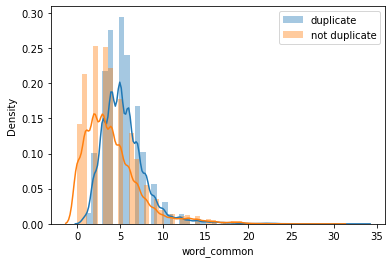

In [27]:
#ploting distplot of word_common in duplicate and non duplicate questions
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='not duplicate')
plt.legend()
plt.show()

In [28]:
#'word_share' is the ratio of total number of common words to the total word in question1 and question2
new_df['word_share']=round(new_df['word_common']/new_df['total_word'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common,word_share
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8,19,4,0.21
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22,32,2,0.06
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24,42,20,0.48
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10,18,5,0.28
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8,19,3,0.16


In [35]:
# Advanced Features

nltk.download('stopwords')
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*6
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + 0.0001)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + 0.0001)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + 0.0001)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + 0.0001)
    
    
    # Last word of both question is same or not
    token_features[4] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[5] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[4], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[5], token_features))

In [37]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common,word_share,cwc_min,cwc_max,csc_min,csc_max,last_word_eq,first_word_eq
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8,19,4,0.21,0.399992,0.333328,0.666644,0.399992,0,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22,32,2,0.06,0.000000,0.000000,0.333328,0.199998,0,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24,42,20,0.48,0.941171,0.941171,0.999975,0.999975,1,1
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10,18,5,0.28,0.499988,0.399992,0.749981,0.599988,0,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8,19,3,0.16,0.399992,0.399992,0.333322,0.166664,0,0


In [38]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*1
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[0] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [39]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['longest_substr_ratio'] = list(map(lambda x: x[0], length_features))

In [40]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common,word_share,cwc_min,cwc_max,csc_min,csc_max,last_word_eq,first_word_eq,longest_substr_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?,1,58,42,11,8,19,4,0.21,0.399992,0.333328,0.666644,0.399992,0,1,0.302326
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,52,105,11,22,32,2,0.06,0.000000,0.000000,0.333328,0.199998,0,0,0.113208
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,125,124,24,24,42,20,0.48,0.941171,0.941171,0.999975,0.999975,1,1,0.584000
54203,54203,107861,107862,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...,1,45,60,8,10,18,5,0.28,0.499988,0.399992,0.749981,0.599988,0,1,0.347826
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?,0,54,39,11,8,19,3,0.16,0.399992,0.399992,0.333322,0.166664,0,0,0.325000


In [41]:
new_df.shape

(35000, 20)

In [42]:
#new question_df which contain only question1 and question2
question_df=new_df[['question1','question2']]

In [43]:
question_df.head()

,question1,question2
339499,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry?
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete?,why does quora detect my question as an incomp...
132566,what is it like working with pivotal labs as a...,what's it like to work at pivotal labs?


In [44]:
#Making a new list of question1 and question2- 'questions' 
questions=list(question_df['question1'])+list(question_df['question2'])
questions[1:10]

['by what age would you think a man should be married?',
 'how would an arbitrageur seek to capitalize given the following conditions: s0 + pa (s0,t,x) < ca (s0,t,x) + x (l + r) ^(-t)?',
 'why did quora mark my question as incomplete?',
 'what is it like working with pivotal labs as a client?',
 'why do i want to cry all the time?',
 'is dna information in compressed form if not how living being develop from a egg with limited information, if yes theory of data compression is wrong?',
 'what is the place of ethics and morality in a concrete life situation of a modern or contemporary men?',
 'how do i improve my english writing and speaking skills?',
 'what are the best bargaining techniques when buying a car from a dealer?']

In [45]:
#Making the 'final_df' a new dataframe by droping 'id','qid1','qid2','question1','question2' column
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])


In [46]:
final_df.head()

,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common,word_share,cwc_min,cwc_max,csc_min,csc_max,last_word_eq,first_word_eq,longest_substr_ratio
339499,1,58,42,11,8,19,4,0.21,0.399992,0.333328,0.666644,0.399992,0,1,0.302326
289521,0,52,105,11,22,32,2,0.06,0.000000,0.000000,0.333328,0.199998,0,0,0.113208
4665,0,125,124,24,24,42,20,0.48,0.941171,0.941171,0.999975,0.999975,1,1,0.584000
54203,1,45,60,8,10,18,5,0.28,0.499988,0.399992,0.749981,0.599988,0,1,0.347826
132566,0,54,39,11,8,19,3,0.16,0.399992,0.399992,0.333322,0.166664,0,0,0.325000


In [48]:
final_df.shape

(35000, 15)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
#Making 3000 bag of word features for question1 and question2 
count_v=CountVectorizer(max_features=3000)
question1_array,question2_array=np.vsplit(count_v.fit_transform(questions).toarray(),2)

In [51]:
#Merginf question1_array and question2_array into a new dataframe
df1=pd.DataFrame(question1_array,index=question_df.index)
df2=pd.DataFrame(question2_array,index=question_df.index)
df3=pd.concat([df1,df2],axis=1)

In [52]:
df3.shape

(35000, 6000)

In [53]:
count_v.get_feature_names()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '100',
 '1000',
 '10k',
 '10th',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '15000',
 '15k',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '200',
 '2000',
 '2008',
 '2010',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '27',
 '28',
 '2nd',
 '30',
 '300',
 '30k',
 '32',
 '35',
 '3d',
 '3g',
 '3rd',
 '40',
 '4620',
 '4g',
 '50',
 '500',
 '50k',
 '60',
 '60000',
 '60k',
 '6s',
 '70',
 '7th',
 '80',
 '90',
 '99',
 'ability',
 'able',
 'about',
 'above',
 'abroad',
 'ac',
 'academic',
 'academy',
 'accent',
 'accenture',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'according',
 'account',
 'accountant',
 'accounts',
 'accurate',
 'achieve',
 'acid',
 'acne',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'addicted',
 'addiction',
 'address',
 'administration'

In [54]:
#Concatinating final_df and df3 i.e bag of word feature
final_df=pd.concat([final_df,df3],axis=1)

In [55]:
final_df.shape

(35000, 6015)

In [56]:
final_df.head()

,is_duplicate,q1_length,q2_length,q1_words,q2_words,total_word,word_common,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,19,4,0.21,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,32,2,0.06,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,42,20,0.48,0.941171,0.941171,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,18,5,0.28,0.499988,0.399992,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,19,3,0.16,0.399992,0.399992,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [59]:
#importing Accuracy score and testing
from sklearn.metrics import accuracy_score

In [60]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
Dt=DecisionTreeClassifier(random_state=1,max_depth=8)

In [62]:
Dt.fit(X_train,y_train)
y_prede=Dt.predict(X_test)

In [63]:
accuracy_score(y_test,y_prede)*100

74.47142857142856

In [64]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)
y_pred=Rf.predict(X_test)

In [65]:
score=accuracy_score(y_test,y_pred)
score=score*100

In [66]:
score

78.95714285714286

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7867142857142857

In [68]:
from sklearn.metrics import confusion_matrix

In [70]:
#confusion matrix for random forest classifier
confusion_matrix(y_test,y_pred)

array([[3658,  675],
       [ 798, 1869]], dtype=int64)

In [71]:
#confusion matrix of xgboost
confusion_matrix(y_test,y_pred1)

array([[3500,  833],
       [ 660, 2007]], dtype=int64)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


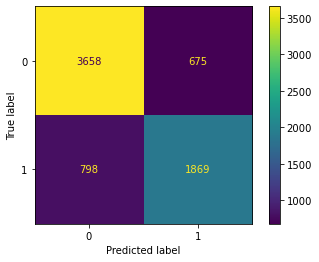

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Rf, X_test, y_test)  
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


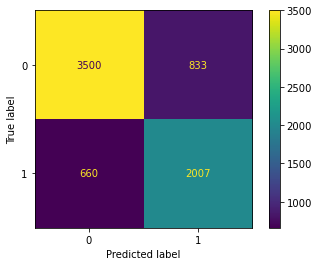

In [74]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

In [75]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [76]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [77]:
def test_fetch_token_features(q1,q2):

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*6
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + 0.0001)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + 0.0001)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + 0.0001)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + 0.0001)
    
    
    
    # Last word of both question is same or not
    token_features[4] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[5] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
  

In [78]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*1
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[0] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [85]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    
    input_query.append(test_total_words(q1,q2))
    input_query.append(test_common_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
     # bow feature for q1
    q1_bow = count_v.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = count_v.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,14),q1_bow,q2_bow))

In [136]:
q1="What is the core idea behind democracy?"
q2="what is the idea behind democracy?"

In [137]:
query_point_creator(q1,q2)

array([[39., 34.,  7., ...,  0.,  0.,  0.]])

In [138]:
Rf.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

In [132]:
import pickle

pickle.dump(Rf,open('model1.pkl','wb'))
pickle.dump(count_v,open('cv1.pkl','wb'))